# Solving three ML problems:
*   **1. Regression Problem (windspeed and humidity relation)**
*   **2. Classification Problem (Predicting Rain Tomorrow)**
*   **3. Clustering Problem (Min and Max Temperature)**

# **Regression Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Importing Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Raeiss/ML-Assignment/main/weatherAUS.csv')

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

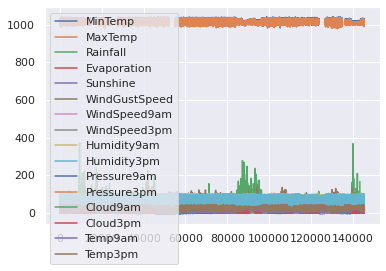

In [ ]:
df.plot()

In [ ]:
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date']) 

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [ ]:
df[['date', 'Year', 'Month', 'Day']]

,date,Year,Month,Day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2
2,2008-12-03,2008,12,3
3,2008-12-04,2008,12,4
4,2008-12-05,2008,12,5
...,...,...,...,...
145455,2017-06-21,2017,6,21
145456,2017-06-22,2017,6,22
145457,2017-06-23,2017,6,23
145458,2017-06-24,2017,6,24


In [ ]:
df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [ ]:
df = df

In [ ]:
df.isnull().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

In [ ]:
missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [ ]:
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [ ]:
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [ ]:
df.dropna(how='all', subset=['raintomorrow'], inplace=True)
df

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


In [ ]:
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

15

In [ ]:
df.head()

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [ ]:
cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

6

In [ ]:
df=df.drop(['rainfall'], axis=1)
num_col
num_col.remove('rainfall')

In [ ]:
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [ ]:
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [ ]:
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

In [ ]:
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
Year             0
Month            0
Day              0
dtype: int64

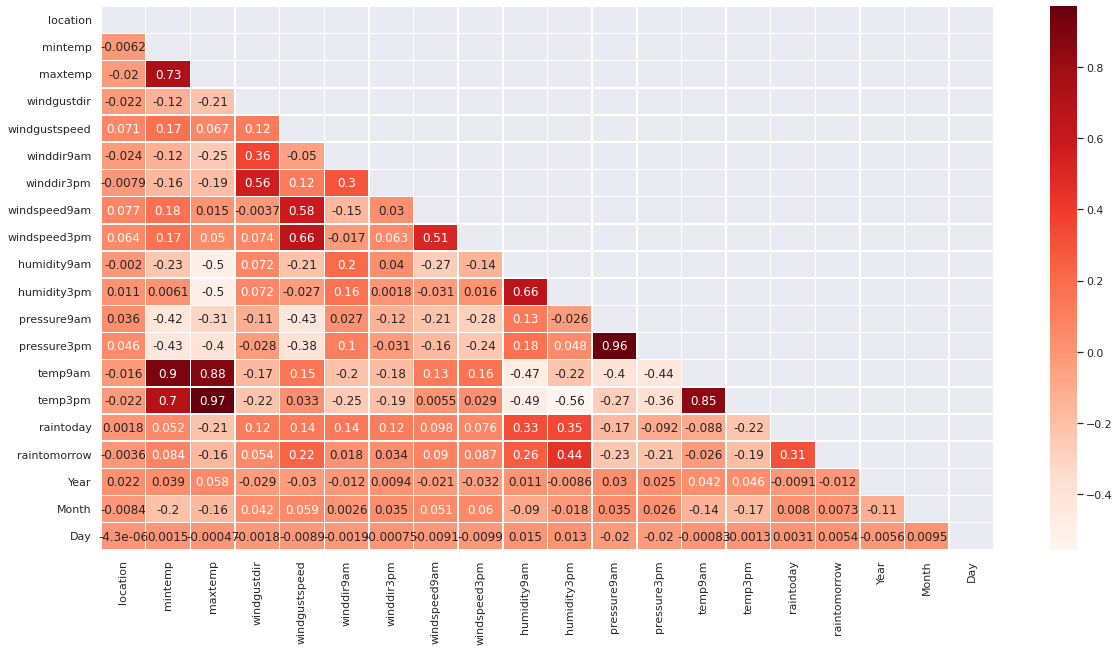

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [ ]:
df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)

In [ ]:
df = df
df = df[['humidity9am', 'windspeed9am']]
df.columns = ['humidity9am', 'windspeed9am']

In [ ]:
df.isnull().sum()

humidity9am     0
windspeed9am    0
dtype: int64

In [ ]:
df = df.dropna(how='any', axis=0)
df

,humidity9am,windspeed9am
0,71.0,20.0
1,44.0,4.0
2,38.0,19.0
3,45.0,11.0
4,82.0,7.0
...,...,...
145454,59.0,15.0
145455,51.0,13.0
145456,56.0,13.0
145457,53.0,9.0


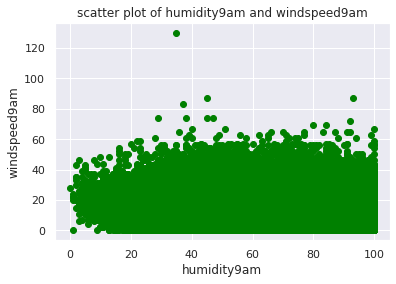

In [ ]:
plt.scatter(df["humidity9am"],df["windspeed9am"], color = "green")
plt.title("scatter plot of humidity9am and windspeed9am")
plt.xlabel("humidity9am")
plt.ylabel("windspeed9am")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


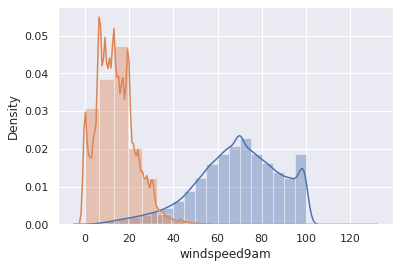

In [ ]:
sns.distplot(df["humidity9am"],bins = 20, kde = True)
sns.distplot(df["windspeed9am"],bins = 20, kde = True)

In [ ]:
correlation = df.corr()

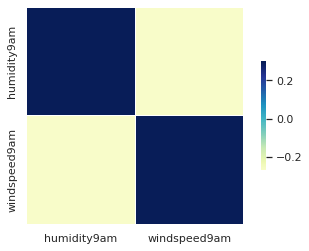

In [ ]:
sns.heatmap(df.corr(),  cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
X =  df.loc[0:10000, ["humidity9am"]]
Y =  df.loc[0:10000, ["windspeed9am"]]

In [ ]:
X_train ,X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.20,random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
perc = r2_score(y_test,y_pred)
print("R2 Linear Regression Score :{:.1%}".format(perc))

R2 Linear Regression Score :15.3%


In [ ]:
mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

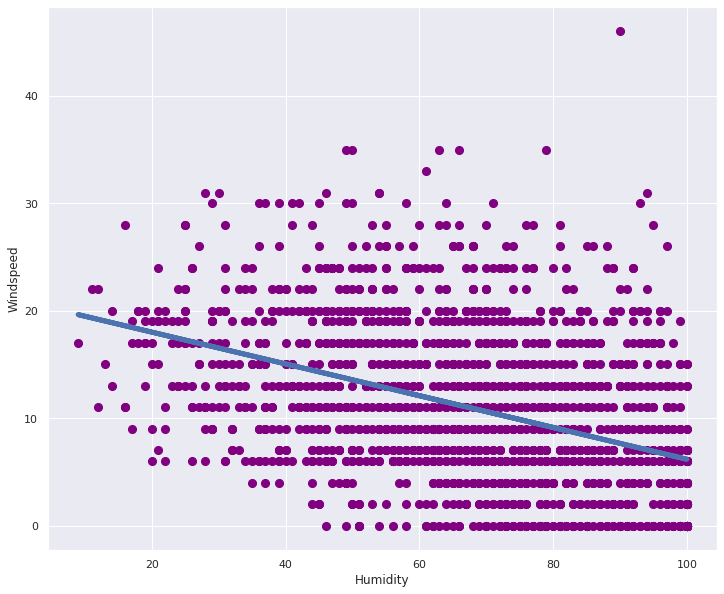

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(X_test,y_test,s=65,c="purple")
plt.plot(X_test,y_pred,c="b",linewidth='5')
plt.xlabel('Humidity')
plt.ylabel('Windspeed')
plt.show()
sns.set(font_scale=1)

# **Clustering Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing Dataset**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Raeiss/ML-Assignment/main/weatherAUS.csv')

In [ ]:
weather = dataset[['MinTemp', 'MaxTemp']]

In [ ]:
weather.columns = ['MinTemp', 'MaxTemp']

In [ ]:
weather.isnull().sum()

MinTemp    1485
MaxTemp    1261
dtype: int64

In [ ]:
weather_ref = weather.dropna(how='any', axis=0)

In [ ]:
weather_ref.isnull().sum()

MinTemp    0
MaxTemp    0
dtype: int64

In [ ]:
X = weather_ref.iloc[0:3000, [0, 1]].values

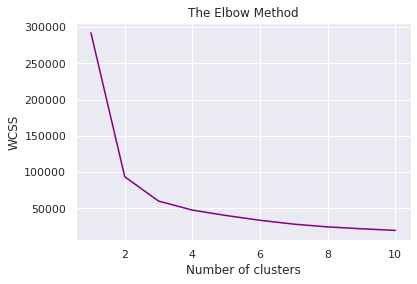

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss , color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

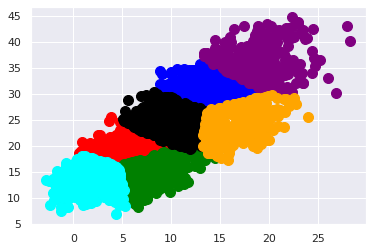

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'orange', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'grey', label = 'Cluster 8')

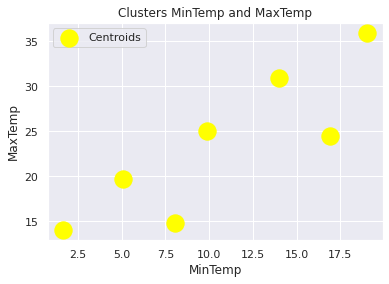

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters MinTemp and MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()

# **Classification Problem**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Importing Dataset**

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/Raeiss/ML-Assignment/main/weatherAUS.csv')

In [ ]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.nunique( )

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date']) # parse as datatime

In [ ]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [ ]:
df[['date', 'Year', 'Month', 'Day']] # preview changes made

,date,Year,Month,Day
0,2008-12-01,2008,12,1
1,2008-12-02,2008,12,2
2,2008-12-03,2008,12,3
3,2008-12-04,2008,12,4
4,2008-12-05,2008,12,5
...,...,...,...,...
145455,2017-06-21,2017,6,21
145456,2017-06-22,2017,6,22
145457,2017-06-23,2017,6,23
145458,2017-06-24,2017,6,24


In [ ]:
df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [ ]:
df = df

In [ ]:
df.isnull().sum()

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

In [ ]:
missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [ ]:
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [ ]:
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [ ]:
df.dropna(how='all', subset=['raintomorrow'], inplace=True)

In [ ]:
df

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


In [ ]:
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

15

In [ ]:
df.head()

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [ ]:
cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

6

In [ ]:
df=df.drop(['rainfall'], axis=1)

In [ ]:
num_col
num_col.remove('rainfall')

In [ ]:
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [ ]:
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [ ]:
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

In [ ]:
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
Year             0
Month            0
Day              0
dtype: int64

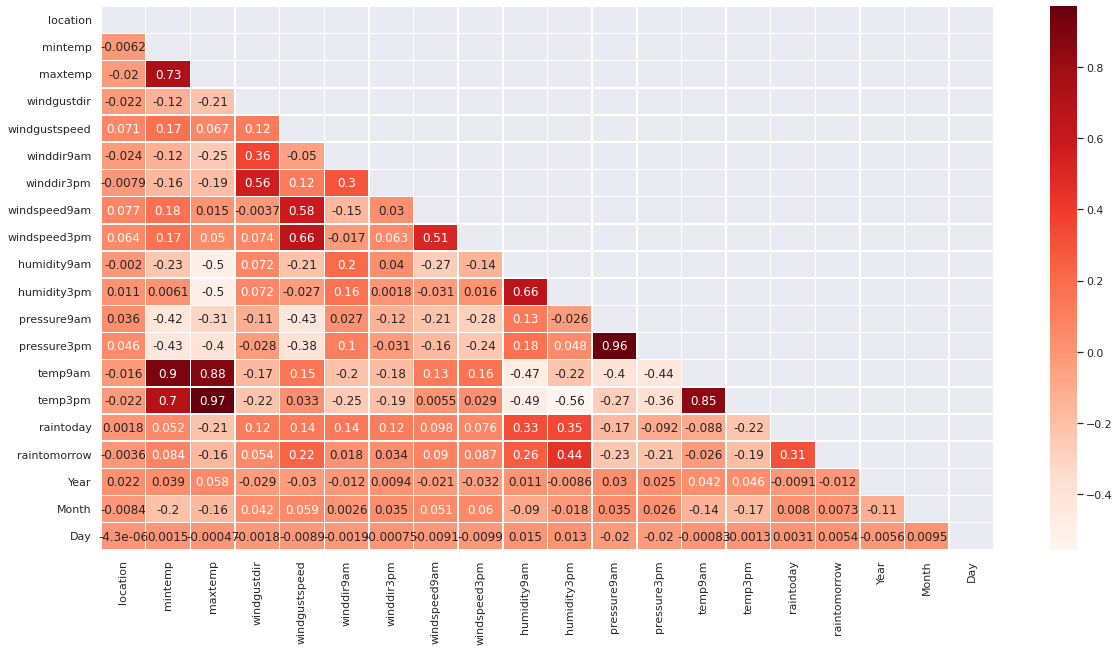

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [ ]:
df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)

In [ ]:
df = df

In [ ]:
X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state = 0)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

In [ ]:
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 83.74%


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

[[31289  1812]
 [ 5125  4432]]


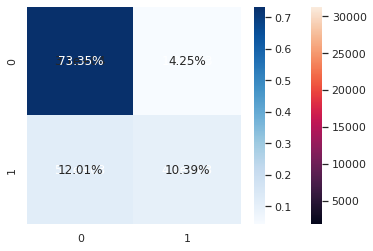

In [ ]:
sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')